In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

# Load the dataset to examine its structure and understand the columns available.
file_path = './training_log.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
data.head()

,Model Size,Dataset Fraction,Epoch,Train Loss,Train Accuracy,Test Accuracy,Test Loss
0,1,0.333333,1,0.419858,43.695,74.00,0.871302
1,1,0.333333,2,0.162988,83.250,88.89,0.387002
2,1,0.333333,3,0.119775,89.840,91.81,0.289169
3,1,0.333333,4,0.100925,91.665,93.08,0.240724
4,1,0.333333,5,0.087500,92.770,92.30,0.251049


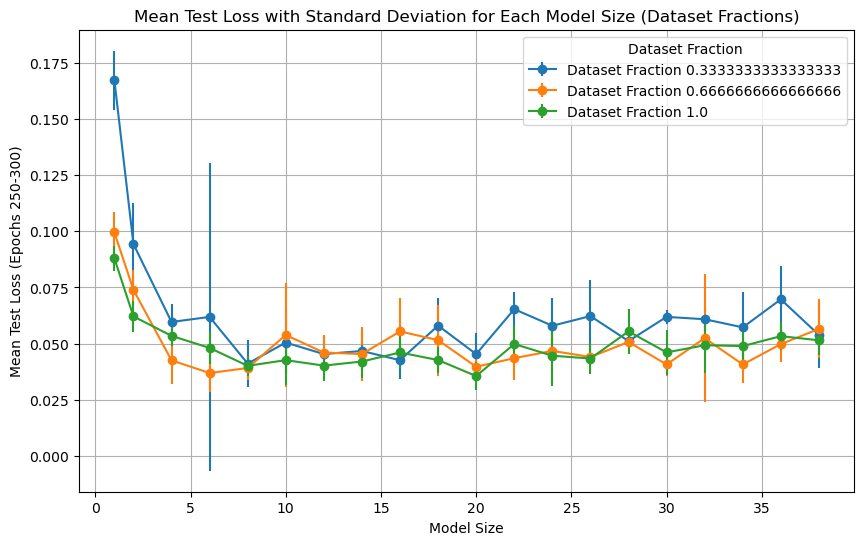

In [4]:
# Filter the data for epochs 250 to 300 to get the last 50 test losses in that range for each model size and dataset fraction.
last_50_epochs_filtered = data[(data['Epoch'] >= 250) & (data['Epoch'] <= 300)]

# Calculate mean and standard deviation of Test Loss for each Model Size and Dataset Fraction in the filtered range
summary_stats_filtered = last_50_epochs_filtered.groupby(['Model Size', 'Dataset Fraction'])['Test Loss'].agg(['mean', 'std']).reset_index()

# Plotting with Model Size on the x-axis and Test Loss (mean and std) on the y-axis
plt.figure(figsize=(10, 6))

# Iterate over each dataset fraction to plot the model size vs. mean and std of Test Loss
for data_fraction in summary_stats_filtered['Dataset Fraction'].unique():
    subset = summary_stats_filtered[summary_stats_filtered['Dataset Fraction'] == data_fraction]
    plt.errorbar(subset['Model Size'], subset['mean'], yerr=subset['std'], label=f'Dataset Fraction {data_fraction}', fmt='-o')

plt.xlabel('Model Size')
plt.ylabel('Mean Test Loss (Epochs 250-300)')
plt.title('Mean Test Loss with Standard Deviation for Each Model Size (Dataset Fractions)')
plt.legend(title='Dataset Fraction')
plt.grid(True)
plt.show()

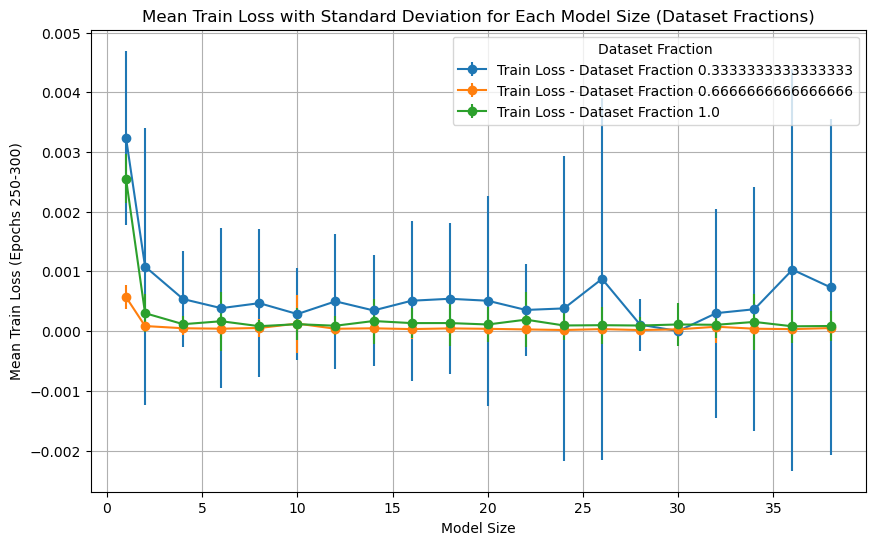

In [6]:
# Plotting only the Train Loss with Model Size on the x-axis and Train Loss on the y-axis
plt.figure(figsize=(10, 6))

# Plot for Train Loss
for data_fraction in summary_stats_filtered['Dataset Fraction'].unique():
    subset = summary_stats_filtered[summary_stats_filtered['Dataset Fraction'] == data_fraction]
    plt.errorbar(subset['Model Size'], subset['train_loss_mean'], yerr=subset['train_loss_std'], label=f'Train Loss - Dataset Fraction {data_fraction}', fmt='-o')

plt.xlabel('Model Size')
plt.ylabel('Mean Train Loss (Epochs 250-300)')
plt.title('Mean Train Loss with Standard Deviation for Each Model Size (Dataset Fractions)')
plt.legend(title='Dataset Fraction')
plt.grid(True)
plt.show()

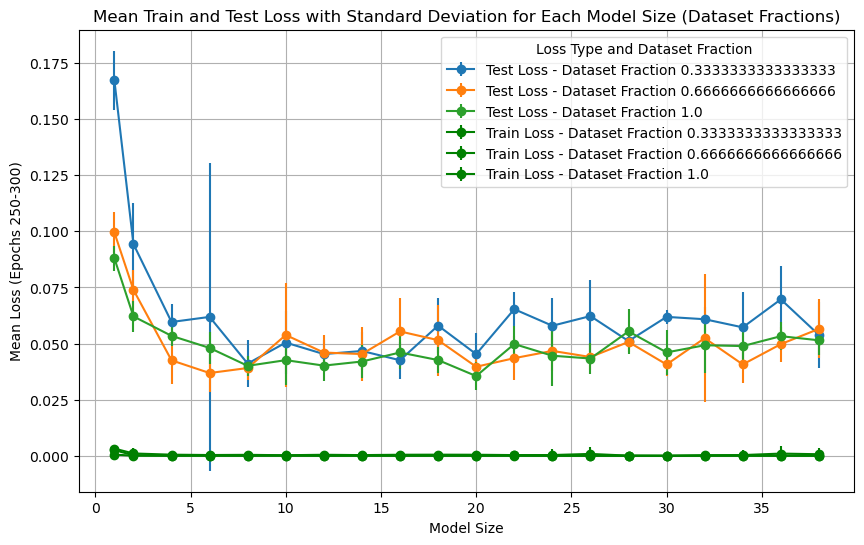

In [5]:
# Calculate mean and standard deviation for both Test Loss and Train Loss over the last 50 epochs (250-300)
summary_stats_filtered = last_50_epochs_filtered.groupby(['Model Size', 'Dataset Fraction']).agg(
    test_loss_mean=('Test Loss', 'mean'),
    test_loss_std=('Test Loss', 'std'),
    train_loss_mean=('Train Loss', 'mean'),
    train_loss_std=('Train Loss', 'std')
).reset_index()

# Plotting with Model Size on the x-axis and Loss (Test and Train) on the y-axis
plt.figure(figsize=(10, 6))

# Plot for Test Loss
for data_fraction in summary_stats_filtered['Dataset Fraction'].unique():
    subset = summary_stats_filtered[summary_stats_filtered['Dataset Fraction'] == data_fraction]
    plt.errorbar(subset['Model Size'], subset['test_loss_mean'], yerr=subset['test_loss_std'], label=f'Test Loss - Dataset Fraction {data_fraction}', fmt='-o')

# Plot for Train Loss (using different colors for distinction)
for data_fraction in summary_stats_filtered['Dataset Fraction'].unique():
    subset = summary_stats_filtered[summary_stats_filtered['Dataset Fraction'] == data_fraction]
    plt.errorbar(subset['Model Size'], subset['train_loss_mean'], yerr=subset['train_loss_std'], label=f'Train Loss - Dataset Fraction {data_fraction}', fmt='-o', color='green')

plt.xlabel('Model Size')
plt.ylabel('Mean Loss (Epochs 250-300)')
plt.title('Mean Train and Test Loss with Standard Deviation for Each Model Size (Dataset Fractions)')
plt.legend(title='Loss Type and Dataset Fraction')
plt.grid(True)
plt.show()